# Project(mid-term) : Predicting Delayed Flights
### 제출일 : 2023.05.22
### 성명 및 학번 : 오혜민(2023254013)

## "a" 요구사항 기준 작성 코드

In [13]:
!pip install mord
!pip install dmba

In [14]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [17]:
delays_df=dmba.load_data('FlightDelays.csv')

#convert to categorical 
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

#create hourly bins departure time
delays_df.CRS_DEP_TIME = [round(t/200) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')


# Create an indicator variable
delays_df['isDelayed'] = [1 if status == 'delayed' else 0 
                          for status in delays_df['Flight Status']]

In [18]:
print(delays_df.head)

<bound method NDFrame.head of      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM ORIGIN  \
0               7      OH      1455  JFK       184  01/01/2004    5935    BWI   
1               8      DH      1640  JFK       213  01/01/2004    6155    DCA   
2               6      DH      1245  LGA       229  01/01/2004    7208    IAD   
3               9      DH      1709  LGA       229  01/01/2004    7215    IAD   
4               5      DH      1035  LGA       229  01/01/2004    7792    IAD   
...           ...     ...       ...  ...       ...         ...     ...    ...   
2196            3      RU       644  EWR       199   1/31/2004    2761    DCA   
2197            8      RU      1653  EWR       213   1/31/2004    2497    IAD   
2198            8      RU      1558  EWR       199   1/31/2004    2361    DCA   
2199            7      RU      1403  EWR       199   1/31/2004    2216    DCA   
2200            9      RU      1736  EWR       199   1/31/2004    2097    DCA  

In [19]:
# Select predictors and the outcome variable
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
outcome = 'isDelayed'

# Create dummy variables for categorical predictors
X = pd.get_dummies(delays_df[predictors], drop_first=True)
y = delays_df[outcome]
classes = ['ontime', 'delayed']

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [20]:
delays_df = delays_df.drop(columns=['DEP_TIME', 'DAY_OF_MONTH'])

In [24]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse=False)
X = pd.get_dummies(delays_df[predictors], drop_first=True)

y = delays_df['isDelayed']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

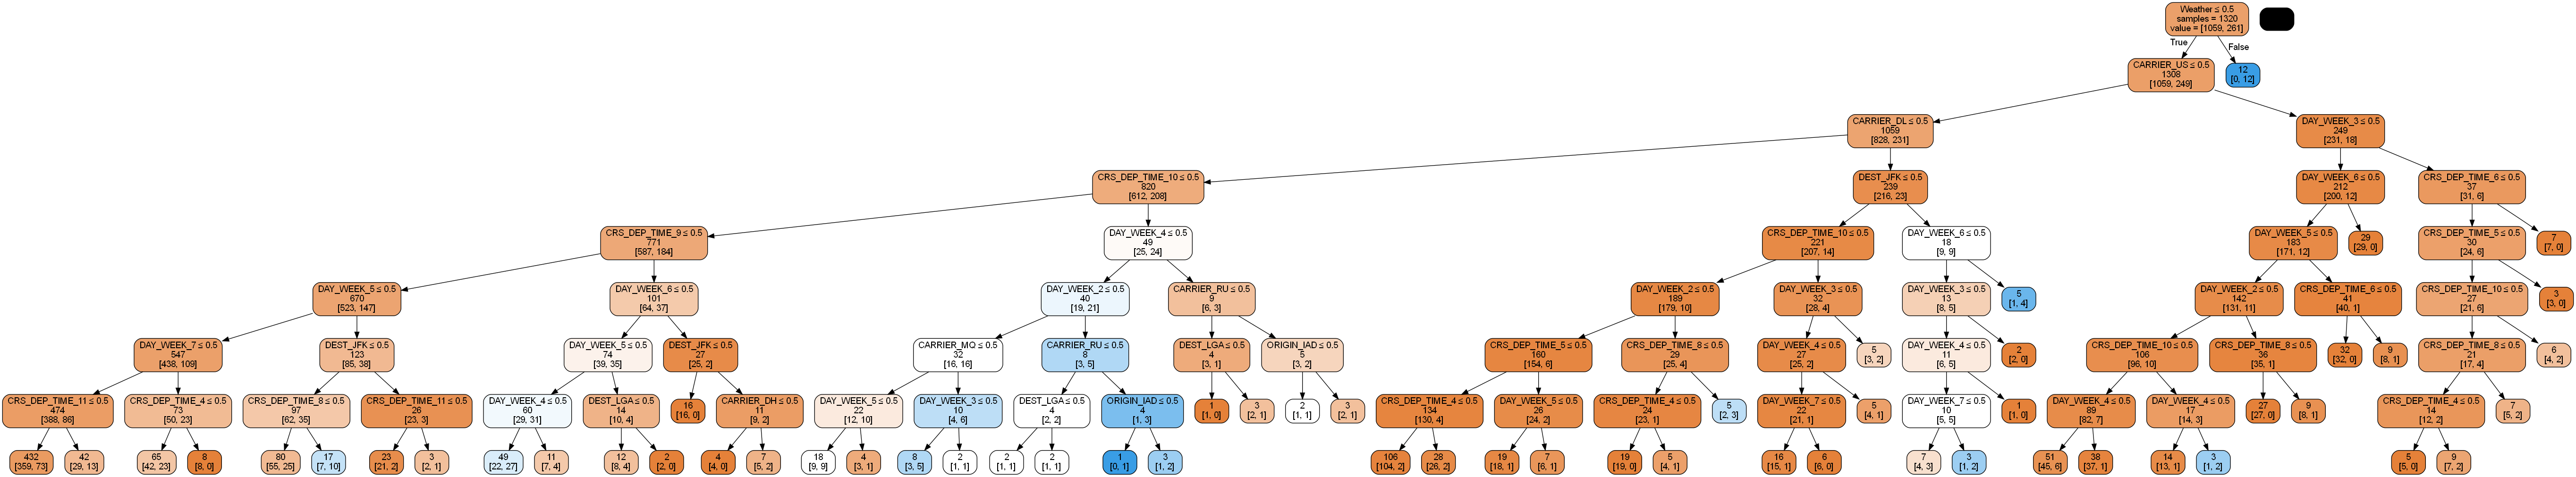

In [25]:
fullClassTree = DecisionTreeClassifier(max_depth=8)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [26]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.8075757575757574
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}
Improved score:  0.8113636363636363
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


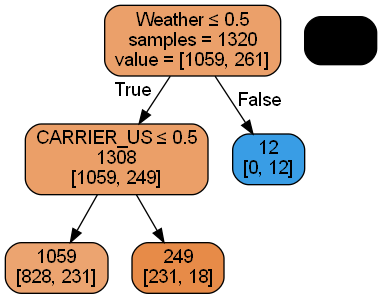

In [27]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [28]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual    0    1
     0 1059    0
     1  249   12
Confusion Matrix (Accuracy 0.8331)

       Prediction
Actual   0   1
     0 714   0
     1 147  20


## "c" 요구사항 기준 작성 코드

In [32]:
delays_df=dmba.load_data('FlightDelays.csv')

#convert to categorical 
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

#create hourly bins departure time
delays_df.CRS_DEP_TIME = [round(t/200) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')


# Create an indicator variable
delays_df['isDelayed'] = [1 if status == 'delayed' else 0 
                          for status in delays_df['Flight Status']]

In [33]:
# delete "Weahter"
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
outcome = 'isDelayed'

# Create dummy variables for categorical predictors
X = pd.get_dummies(delays_df[predictors], drop_first=True)
y = delays_df[outcome]
classes = ['ontime', 'delayed']

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [34]:
delays_df = delays_df.drop(columns=['DEP_TIME', 'DAY_OF_MONTH'])

In [35]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse=False)
X = pd.get_dummies(delays_df[predictors], drop_first=True)

y = delays_df['isDelayed']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

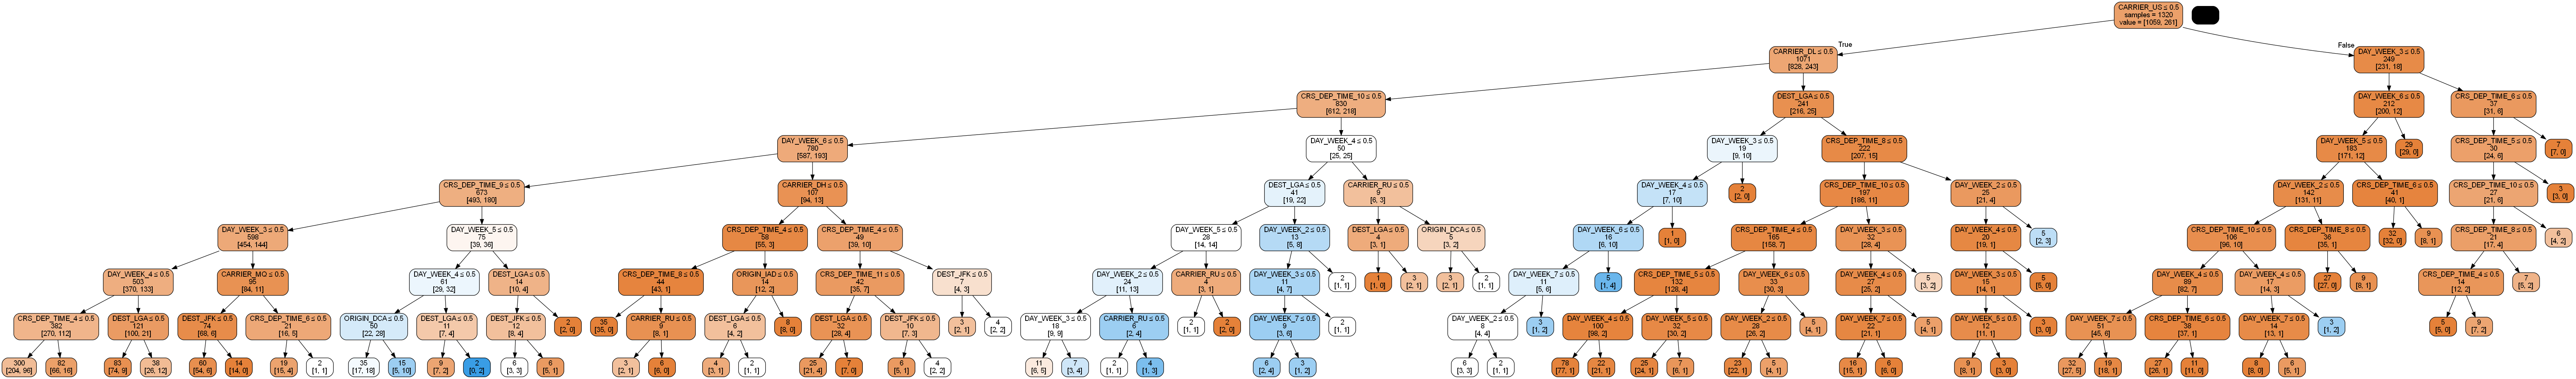

In [36]:
fullClassTree = DecisionTreeClassifier(max_depth=8)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [37]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.8022727272727271
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 20}
Improved score:  0.8022727272727271
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


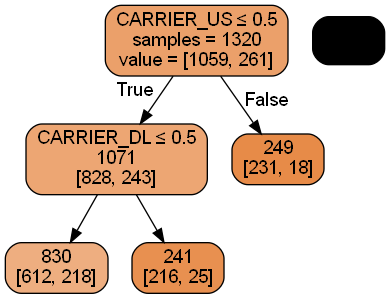

In [38]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)